Análisis de Datos - README
Objetivo General
El objetivo principal de este análisis de datos es investigar y comprender las tendencias y patrones en un conjunto de datos que contiene información sobre los precios de productos alimentarios en diferentes mercados y regiones. Mediante este análisis, buscamos extraer información valiosa que pueda respaldar la toma de decisiones relacionadas con la economía y la producción de alimentos.




Objetivos Específicos
Identificar los productos alimentarios más caros y más baratos en promedio a lo largo de los años y regiones. Esto nos ayudará a comprender las fluctuaciones de precios y su impacto en la accesibilidad a los alimentos en diferentes áreas geográficas.

Analizar la relación entre el tipo de moneda y los precios de los productos alimentarios. Investigaremos si hay una correlación entre la moneda utilizada y los precios de los alimentos, lo que podría tener implicaciones en términos de estabilidad económica.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import jupyter
from sklearn import preprocessing
import scipy.stats as stats

Datos Utilizados
Los datos utilizados en este análisis provienen del archivo CSV "global_food_prices.csv". El conjunto de datos contiene múltiples columnas que proporcionan información detallada sobre los productos alimentarios, los mercados, las fechas y los precios. A continuación, se describe brevemente cada variable:

adm0_id: Identificación del país.
adm0_name: Nombre del país.
adm1_id: Identificación de la subdivisión administrativa.
adm1_name: Nombre de la subdivisión administrativa.
mkt_id: Identificación del mercado.
mkt_name: Nombre del mercado.
cm_id: Identificación del producto.
cm_name: Nombre del producto.
cur_id: Identificación de la moneda.
cur_name: Nombre de la moneda.
pt_id: Identificación del tipo de precio.
pt_name: Nombre del tipo de precio.
um_id: Identificación de la unidad de medida.
um_name: Nombre de la unidad de medida.
mp_month: Mes del precio.
mp_year: Año del precio.
mp_price: Precio del producto en la unidad de medida especificada.
mp_commoditysource: Fuente de datos del producto.

In [3]:
data = pd.read_csv('global_food_prices.csv')




C:\Users\srued\AppData\Local\Temp\ipykernel_3112\2218831029.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('global_food_prices.csv')


Exploración Inicial de los Datos: Hemos cargado el conjunto de datos y realizado una exploración inicial para comprender la estructura y el contenido de los datos.

In [8]:
# Muestra las primeras filas del DataFrame para obtener una vista previa de los datos
data.head()

# Obtén información sobre las columnas y tipos de datos
data.info()

# Resumen estadístico de las variables numéricas
data.describe()

# Número de filas y columnas en el DataFrame
filas, columnas = data.shape

# Muestra una lista de las columnas en el conjunto de datos
columnas = data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050638 entries, 0 to 2050637
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   adm0_id             float64
 1   adm0_name           object 
 2   adm1_id             int64  
 3   adm1_name           object 
 4   mkt_id              int64  
 5   mkt_name            object 
 6   cm_id               int64  
 7   cm_name             object 
 8   cur_id              float64
 9   cur_name            object 
 10  pt_id               int64  
 11  pt_name             object 
 12  um_id               int64  
 13  um_name             object 
 14  mp_month            int64  
 15  mp_year             int64  
 16  mp_price            float64
 17  mp_commoditysource  float64
dtypes: float64(4), int64(7), object(7)
memory usage: 281.6+ MB


Limpieza de Datos: Hemos identificado y manejado datos faltantes, duplicados y posibles errores en las columnas.

In [9]:
data.dropna(inplace=True)  # Elimina filas con valores faltantes

# Manejar duplicados (si es necesario)
data.drop_duplicates(inplace=True)  # Elimina filas duplicadas

# Verificar y convertir tipos de datos
data['mp_price'] = pd.to_numeric(data['mp_price'], errors='coerce')  # Convierte la columna 'mp_price' a tipo numérico, manejando errores.

# Explorar y verificar los datos limpios
data.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource


Análisis de Precios Promedio: Hemos calculado y visualizado los precios promedio de los productos alimentarios a lo largo de los años y las regiones. Esto incluye la identificación de los productos más caros y más baratos.

C:\Users\srued\AppData\Local\Temp\ipykernel_3112\729318089.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('global_food_prices.csv')


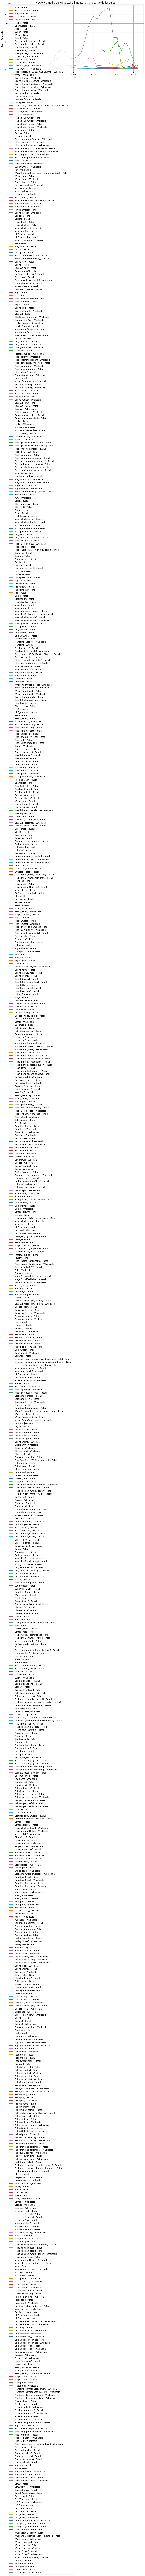

Productos más caros por año:
    mp_year                                            cm_name      mp_price
0      1990                           Rice (imported) - Retail  2.013889e+02
1      1991                           Rice (imported) - Retail  1.889706e+02
2      1992                           Rice (imported) - Retail  1.963889e+02
3      1993                           Rice (imported) - Retail  1.982500e+02
4      1994                           Rice (imported) - Retail  2.557639e+02
5      1995                             Sorghum (red) - Retail  1.225000e+03
6      1996                           Rice (imported) - Retail  1.668099e+03
7      1997                              Meat (camel) - Retail  5.908335e+05
8      1998                              Meat (camel) - Retail  5.926250e+05
9      1999                              Meat (camel) - Retail  5.160000e+05
10     2000  Livestock (sheep, one-year-old alive female) -...  1.060087e+06
11     2001  Livestock (sheep, one-year-old ali

In [27]:
# Cargar el conjunto de datos desde el archivo CSV
data = pd.read_csv('global_food_prices.csv')

# Convertir la columna 'mp_year' a tipo numérico si aún no lo está
data['mp_year'] = pd.to_numeric(data['mp_year'], errors='coerce')

# Calcular el precio promedio por año y producto
precios_promedio = data.groupby(['mp_year', 'cm_name'])['mp_price'].mean().reset_index()

# Identificar los productos más caros por año
productos_mas_caros = precios_promedio.groupby('mp_year').apply(lambda x: x[x['mp_price'] == x['mp_price'].max()]).reset_index(drop=True)

# Identificar los productos más baratos por año
productos_mas_baratos = precios_promedio.groupby('mp_year').apply(lambda x: x[x['mp_price'] == x['mp_price'].min()]).reset_index(drop=True)

# Visualizar los precios promedio de productos a lo largo de los años
plt.figure(figsize=(12, 6))
for producto in precios_promedio['cm_name'].unique():
    datos_producto = precios_promedio[precios_promedio['cm_name'] == producto]
    plt.plot(datos_producto['mp_year'], datos_producto['mp_price'], label=producto)

plt.xlabel('Año')
plt.ylabel('Precio Promedio')
plt.title('Precio Promedio de Productos Alimentarios a lo Largo de los Años')
plt.legend()
plt.grid()
plt.show()

# Mostrar los productos más caros y más baratos por año
print("Productos más caros por año:")
print(productos_mas_caros)

print("\nProductos más baratos por año:")
print(productos_mas_baratos)









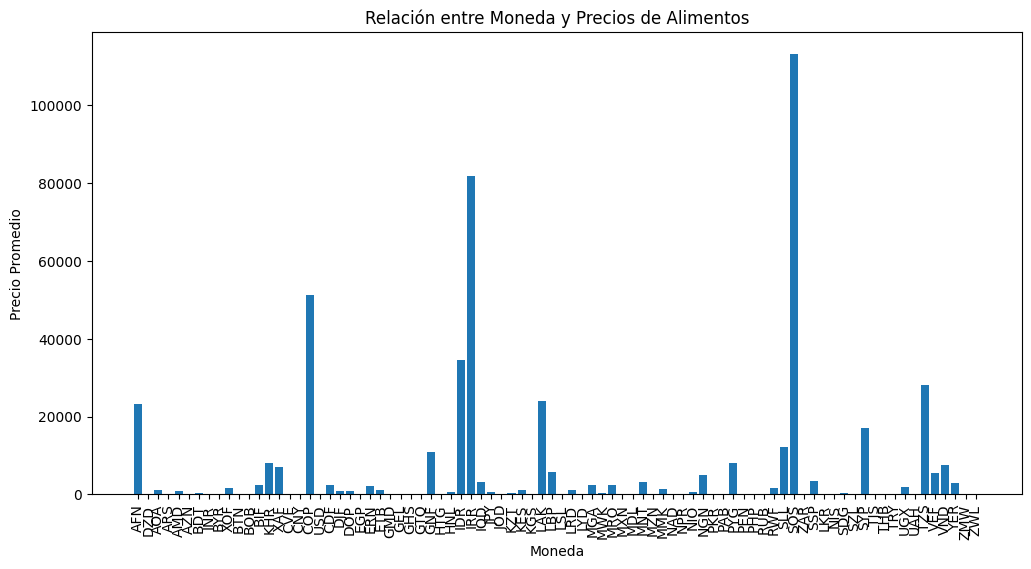

In [28]:


# Asegúrate de que la columna 'mp_price' sea numérica
data['mp_price'] = pd.to_numeric(data['mp_price'], errors='coerce')

# Agrupar los datos por la moneda utilizada y calcular el precio promedio
monedas = data['cur_name'].unique()
precio_promedio_por_moneda = []

for moneda in monedas:
    datos_moneda = data[data['cur_name'] == moneda]
    precio_promedio = datos_moneda['mp_price'].mean()
    precio_promedio_por_moneda.append((moneda, precio_promedio))

# Crear un DataFrame con los resultados
df_precio_promedio = pd.DataFrame(precio_promedio_por_moneda, columns=['Moneda', 'Precio Promedio'])

# Visualizar la relación entre la moneda y los precios
plt.figure(figsize=(12, 6))
plt.bar(df_precio_promedio['Moneda'], df_precio_promedio['Precio Promedio'])
plt.xlabel('Moneda')
plt.ylabel('Precio Promedio')
plt.title('Relación entre Moneda y Precios de Alimentos')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor claridad
plt.show()


Visualizacion de productos mas caros 

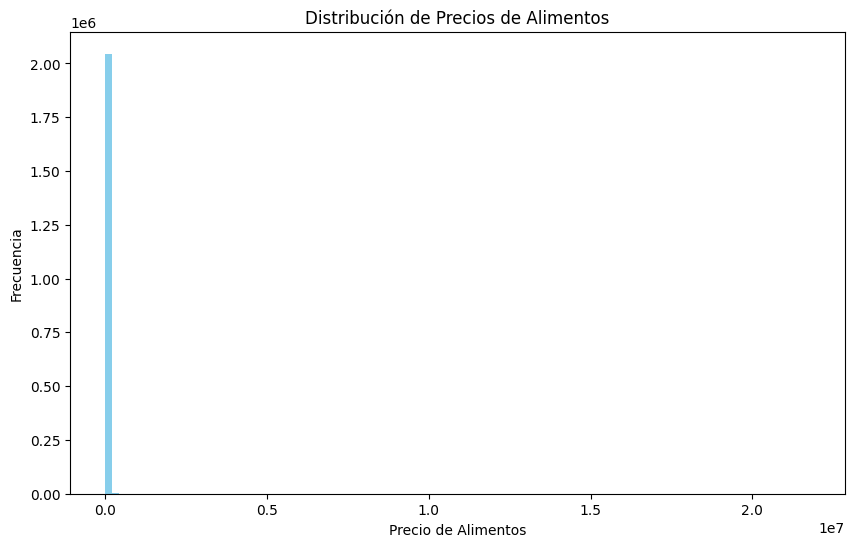

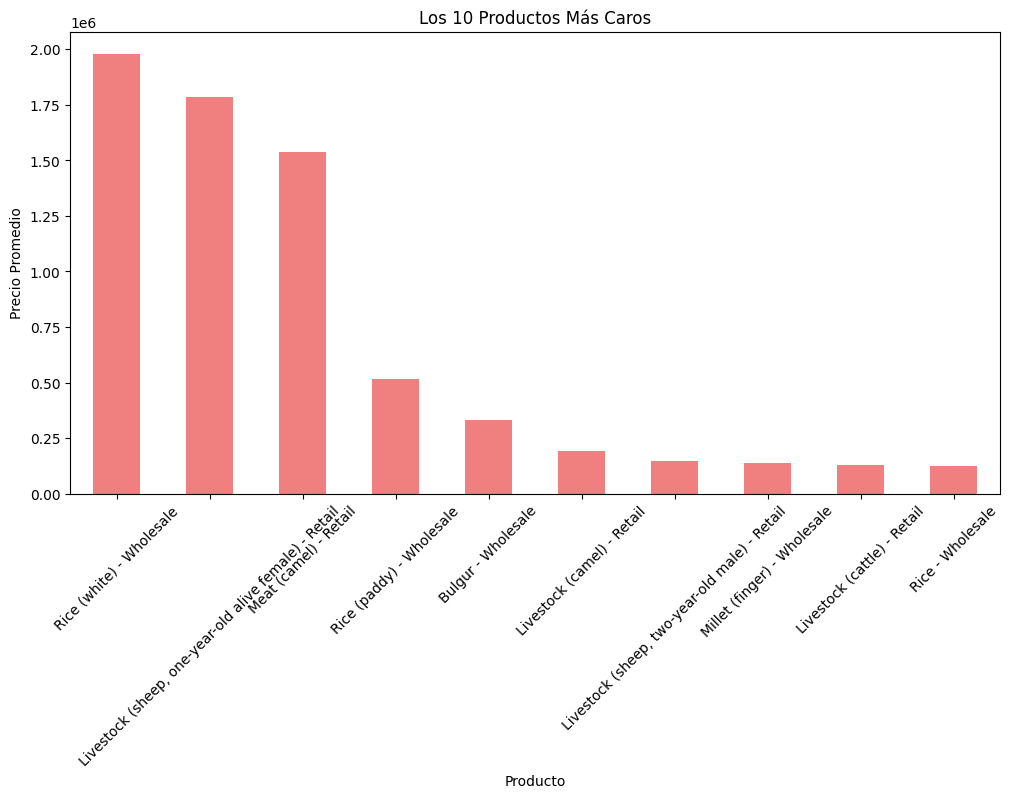

In [30]:

ribución de Precios de Alimentos')
plt.show()

# Ejemplo de un gráfico de barras
productos_mas_caros = data.groupby('cm_name')['mp_price'].mean().nlargest(10)
plt.figure(figsize=(12, 6))
productos_mas_caros.plot(kind='bar', color='lightcoral')
plt.xlabel('Producto')
plt.ylabel('Precio Promedio')
plt.title('Los 10 Productos Más Caros')
plt.xticks(rotation=45)
plt.show()
